In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [7]:
chkpt = "results/checkpoints_20200425-2305"
# chkpt = "org_checkpoints_20200425-2347"
fewer_epochs = 8
epochs = 15

In [3]:
import tensorflow as tf
file_writer = tf.summary.create_file_writer(chkpt + "/val_losses")
file_writer.set_as_default()

In [4]:
from scipy.special import expit, logit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)

# Training
---
## Losses

In [8]:
with open(f"{chkpt}/train_losses.pkl", "rb") as handle:
    train_losses = pickle.load(handle)
train_losses = np.asarray(train_losses).reshape((fewer_epochs, -1))
# train_losses = norm(train_losses)

In [9]:
for i, tl in enumerate(train_losses): 
    tf.summary.histogram("train_losses", tl, step=i)

# Probs

In [10]:
with open(f"{chkpt}/train_preds.pkl", "rb") as handle:
    train_preds = pickle.load(handle)
train_preds = np.asarray([p.detach().numpy() for p in train_preds]).reshape((fewer_epochs, -1))
train_preds = norm(train_preds)

In [11]:
for i, tp in enumerate(train_preds): 
    tf.summary.histogram("train_preds", tp, step=i)

# Validation
---
## Losses

In [12]:
val_dicts = []
for i in range(1, epochs+1):
    with open(f"{chkpt}/validation_epoch_{i:02d}.pth", "rb") as handle:
        val_dicts.append(pickle.load(handle))

In [13]:
val_losses = np.asarray([vd["losses"].numpy() for vd in val_dicts])
for i, vl in enumerate(val_losses): 
    tf.summary.histogram("val_losses", vl, step=i)

In [14]:
print(train_losses.mean(axis=-1), "\n")
print(val_losses.mean(axis=-1), "\n")

[0.5526955  0.5551068  0.5490086  0.5483137  0.54575557 0.5503721
 0.54993254 0.5505173 ] 

[0.6311042  0.613545   0.6023086  0.5986705  0.5897551  0.5881862
 0.5771536  0.5759237  0.5705446  0.5635549  0.5606594  0.55693394
 0.550147   0.54842603 0.5502128 ] 



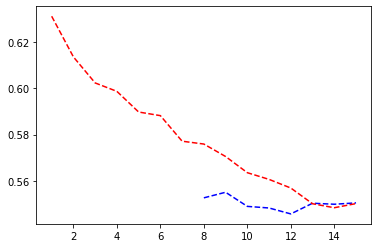

In [32]:
plt.plot(range(epochs-fewer_epochs+1, epochs+1), train_losses.mean(axis=-1), '--', c="blue")
plt.plot(range(1, epochs+1), val_losses.mean(axis=-1), '--', c="red")

(28,)
(420,)


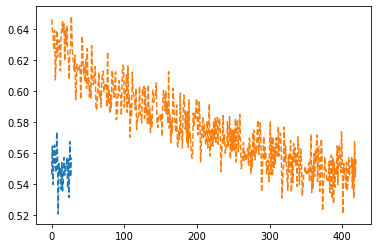

In [26]:
train_batches = train_losses.flatten().reshape((-1, 500)).mean(axis=-1)
val_batches = val_losses.flatten().reshape((-1, 500)).mean(axis=-1)
print(train_batches.shape)
print(val_batches.shape)
plt.plot(range(28), train_batches, '--')
plt.plot(range(420), val_batches, '--')

## Probs

In [27]:
val_probs = np.asarray([vd["probs"].numpy() for vd in val_dicts])
val_probs = norm(val_probs)
for i, vp in enumerate(val_probs):
    print(i)
    tf.summary.histogram("val_probs", vp, step=i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [28]:
from scipy.special import expit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)
norm(val_probs).max()

1.5817707

In [29]:
rands = expit(np.random.uniform(-1, 1, 100000))

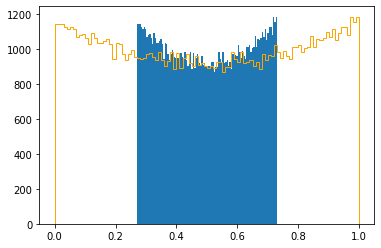

In [30]:
_ = plt.hist(rands, bins=100)
_ = plt.hist(norm(rands), bins=100, color="orange", histtype="step")

In [31]:
expit(-1), logit(0.4), expit(1)

(0.2689414213699951, -0.4054651081081643, 0.7310585786300049)